In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score 
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve
import seaborn as sns

In [2]:
# Reset PN-sequence generator.
seed = 42
np.random.seed(seed)

### Criando 2 classes desbalanceadas

In [3]:
# Define the number of different classes.
numberOfClasses = 2

# Number of examples.
N = 20000

# Create a 3-class dataset for classification.
centers = [[-1, 0], [0, 1.5]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

# Unbalancing the classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
X = np.r_[X[idx0[0:100].reshape(100,),:], X[idx1.reshape(len(idx1),),:]]
y = np.r_[y[idx0[0:100].reshape(100,)], y[idx1.reshape(len(idx1),)]]

### Plotando as 2 classes desbalanceadas.

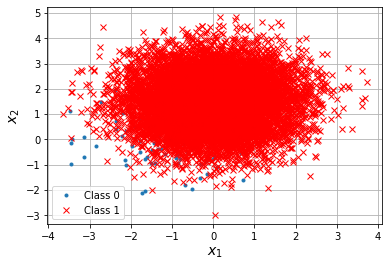

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Criando a matrize de atributo com formato específico.

In [5]:
X = np.c_[np.ones((len(y), 1)), X]

### Instanciando e treinando o classificador.

In [6]:
# Instantiate LogisticRegression object for multi-class case.
model = LogisticRegression(random_state=seed)

# Train model.
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Plotando as regiões de decisão.

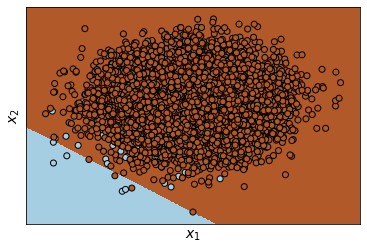

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Plotando a matriz de confusão.

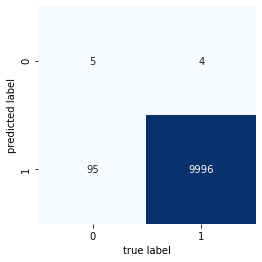

In [8]:
# Predict.
y_pred = model.predict(X)

# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [18]:
acc = accuracy_score(y, y_pred)

print('Accuracy of Logistic Regression model is: %1.8f' % (acc*100))

Accuracy of Logistic Regression model is: 99.01980198


In [10]:
precision = precision_score(y, y_pred, average=None)

print('Precision score is:', precision)

Precision score is: [0.55555556 0.99058567]


In [11]:
recall = recall_score(y, y_pred, average=None)

print('Recall is:', recall)

Recall is: [0.05   0.9996]


In [12]:
f1 = f1_score(y, y_pred, average=None)

print('F1-score is:', f1)

F1-score is: [0.09174312 0.99507242]


### Relatório mostrando as principais métricas de classificação.

In [13]:
print(classification_report(y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5556    0.0500    0.0917       100
           1     0.9906    0.9996    0.9951     10000

    accuracy                         0.9902     10100
   macro avg     0.7731    0.5248    0.5434     10100
weighted avg     0.9863    0.9902    0.9861     10100



### Plotando a curva ROC.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.900


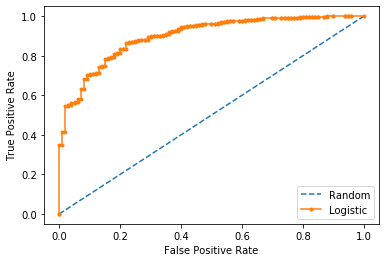

In [27]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y))]

# predict probabilities
lr_probs = model.predict_proba(X)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Plotando a curva de Precision-Recall

Logistic: f1=0.995 auc=0.999


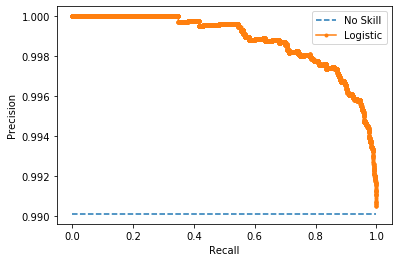

In [31]:
# predict class values
yhat = model.predict(X)

lr_precision, lr_recall, _ = precision_recall_curve(y, lr_probs)
lr_f1, lr_auc = f1_score(y, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y[y==1]) / len(y)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()